 ## *I will start this project of Uber trips analysis by importing the necessary Python libraries and the dataset.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv(r"F:\DATASETS\uber-raw-data-SEP14.csv")

In [57]:
data.shape

(1028136, 4)

In [58]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [59]:
data.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [60]:
data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [61]:
data.nunique()

Date/Time    42907
Lat           5135
Lon           7724
Base             5
dtype: int64

## *This data contain about date and time, latitude and longitude and a base column that contains code affilated with the uber pickup. 

In [62]:
data["Data/Time"] = data["Date/Time"].map(pd.to_datetime)

In [63]:
data.head()

,Date/Time,Lat,Lon,Base,Data/Time
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,2014-09-01 00:01:00
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,2014-09-01 00:01:00
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,2014-09-01 00:03:00
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,2014-09-01 00:06:00
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,2014-09-01 00:11:00


## *Let's prepare the data that I am using to here to analyze the Uber trips according to days and hours.

In [64]:
data["Day"] = data['Data/Time'].apply(lambda x: x.day)
data["Weekday"] = data['Data/Time'].apply(lambda x: x.weekday())
data["Hour"] = data['Data/Time'].apply(lambda x: x.hour)
print(data.head())

          Date/Time      Lat      Lon    Base           Data/Time  Day  \
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512 2014-09-01 00:01:00    1   
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512 2014-09-01 00:01:00    1   
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512 2014-09-01 00:03:00    1   
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512 2014-09-01 00:06:00    1   
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512 2014-09-01 00:11:00    1   

   Weekday  Hour  
0        0     0  
1        0     0  
2        0     0  
3        0     0  
4        0     0  


 ## *I have prepared this data according to the days and hours, as I am using the uber trips for the september month so let's have a look at each day to see on which day the Uber trips were highest.

C:\Users\Vishwesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

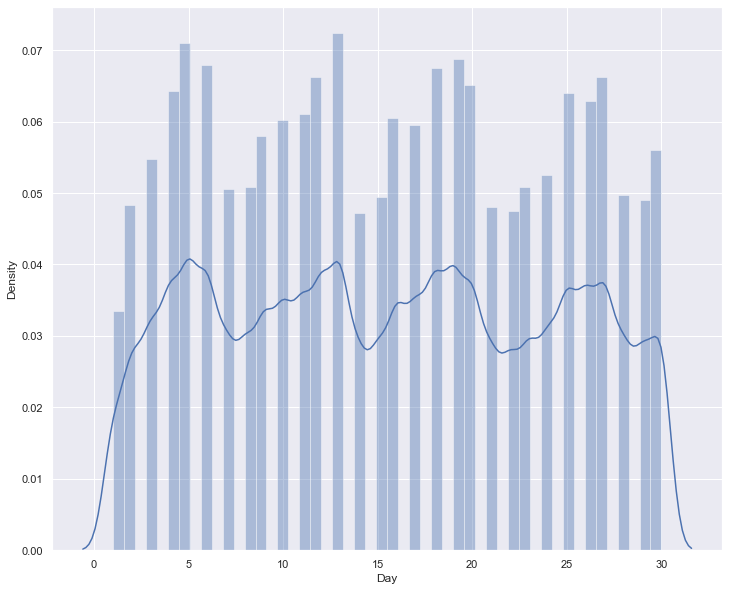

In [54]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

## *By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let's analyze the Uber trips according to the hours.

C:\Users\Vishwesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

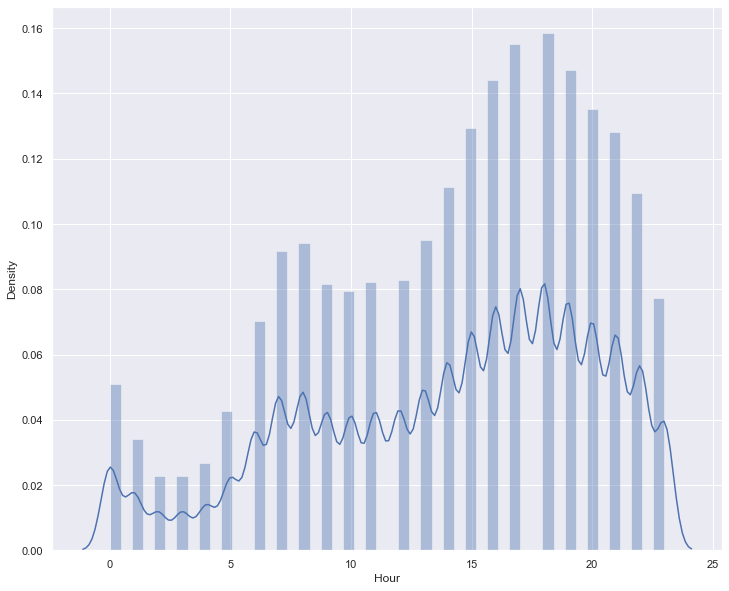

In [42]:
sns.distplot(data["Hour"])

## ***According to the hourly data, the uber trips decreases after midnight and then start increasing after 5 AM and the trips keep rising till 6 PM such that 6 PM is the busiest hour for Uber then the trips start decreasing. Now let's analyze the uber trips according to the weekdays.

C:\Users\Vishwesh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

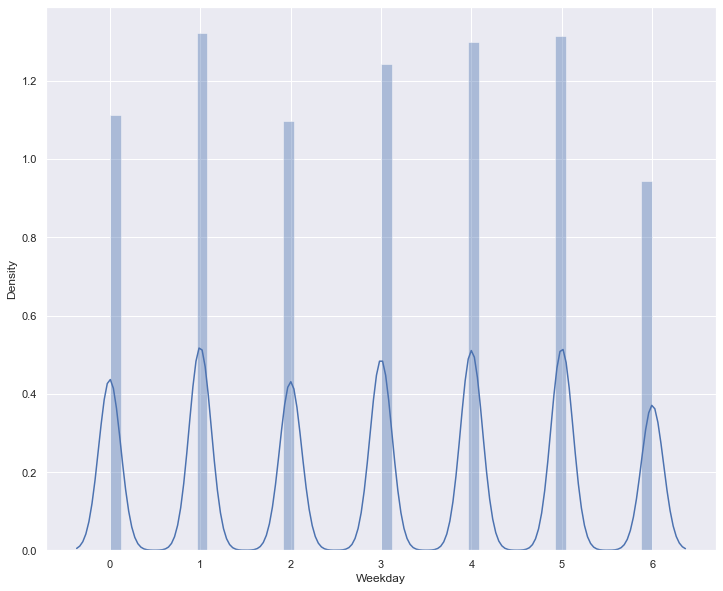

In [43]:
sns.distplot(data["Weekday"])

## ***In above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than just going for work. On Saturdays, the Uber trips are the lowest and on Mondays, they are highest. Now let's have a look at the correlation of hours and weekdays on the Uber trips. 

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

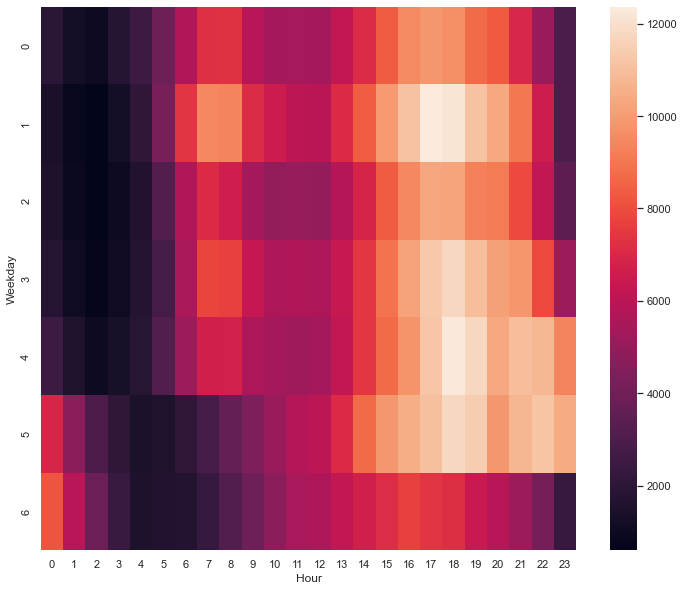

In [44]:
#correlation of Weekend and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

## ***As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


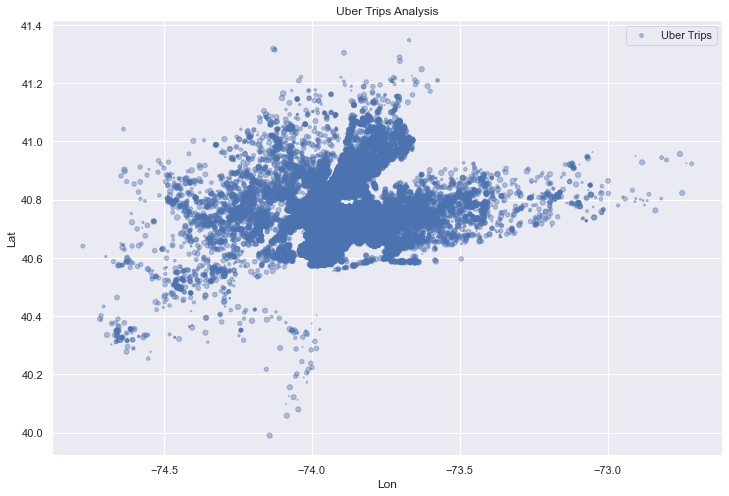

In [53]:
data.plot(kind ='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap("jet"))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

## SUMMARY

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

1. Monday is the most profitable day for Uber.
2. On Saturday less number of people use Uber.
3. 6 PM is the busiest hour for the Uber.
4. On average a rise in Uber trips starts around 5 am.
5. Most of the Uber trips originate near the Manhattan region in New York.